# Imports and Documantation Links

[PyBaseball](https://github.com/jldbc/pybaseball)

[Statcast Documentation](https://baseballsavant.mlb.com/csv-docs)

[MLB Stats API Documentation](https://appac.github.io/mlb-data-api-docs/#game-data-game-type-info-get)

[My Sports Feed](https://www.mysportsfeeds.com/data-feeds/api-docs)

[sports radar](https://sportradar.us/)

In [1]:
pip install pybaseball

  Created wheel for pybaseball: filename=pybaseball-1.0.8-cp36-none-any.whl size=36008 sha256=9e055646128cd693d041e7212bdd0368a1d04135c6189ff68f5badd51a455d14
  Stored in directory: /root/.cache/pip/wheels/d5/7b/fb/b1f8a38eb135628a747627977fd18d13ce2c210cffa08ee5a5
Successfully built pybaseball


In [0]:
import requests
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from pybaseball import statcast
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher
from pybaseball import pitching_stats
from pybaseball import schedule_and_record
from pybaseball import statcast_single_game



---



# Create Objects

In [0]:
class Player:
  
  
  def __init__(self, player_name):
    input_ = "\'" + player_name +"\'"
    self.request = requests.get("http://lookup-service-prod.mlb.com/json/named.search_player_all.bam?sport_code='mlb'&active_sw='Y'&name_part=" + input_)
    self.profile = self.request.json()['search_player_all']['queryResults']['row']
    self.name = self.profile['name_display_first_last']
    self.id = self.profile['player_id']
    self.team = self.profile['team_full']
    self.position = self.profile['position']
    
    
  def __repr__(self):
    return("Name: %s\nID: %s\nTeam: %s\nPosition: %s" % (self.name, self.id, self.team, self.position))
  
  

In [0]:
class Pitcher(Player):
  
  
  def pitching_stats(self, season, game_type = 'R'):
    player_id = str(self.id)
    request = requests.get("http://lookup-service-prod.mlb.com/json/named.sport_pitching_tm.bam?league_list_id='mlb'&game_type='" + game_type + "'&season='" + str(season) + "'&player_id='" + player_id + "'")
    self.pitching_stats = pd.Series(request.json()['sport_pitching_tm']['queryResults']['row'])
    return self.pitching_stats
  
  
  def pitches(self, start_date, end_date): # Date format 'XXXX-XX-XX'
    data = statcast(start_dt=start_date, end_dt=end_date)
    data['player_name'] = data['player_name'].astype(str)
    condition = data['player_name'] == self.name
    pitches = data.where(condition).dropna(axis = 0, thresh = 50)
    pitches = pitches.drop(columns = ['spin_dir','spin_rate_deprecated', 
             'break_angle_deprecated','break_length_deprecated', 'game_type',
             'tfs_deprecated', 'tfs_zulu_deprecated', 'umpire'])
    
    pitches = pitches.sort_values(by = ['game_date', 'at_bat_number', 'pitch_number'])
    #pitches['Pitch_id'] = range(1, Coreys_pitches.shape[0] + 1)
    return pitches
    

In [0]:
class Batter(Player):
  pass

In [0]:
class Game:
  
  def __init__(self, game_id):
    self.data = statcast_single_game(game_id)
    self.pitches_thrown = self.data.shape[0]
    self.game_date = self.data['game_date'][0]
    self.home_team = self.data['home_team'][0]
    self.away_team = self.data['away_team'][0]
    #at bat order list of at bat ID #s
    
    
    
  def __repr__(self):
    return("Game Date: %s\nHome: %s\nAway: %s\nPitches Thrown: %s" % (self.game_date, self.home_team, self.away_team, self.pitches_thrown))

In [0]:
class Inning:
  
  
  def __init__(self, game_id, inning_number):
    pass
  
  
  def __repr__(self):
    pass
  
  
  def top(self):
    pass
  
  
  def bottom(self):
    pass
  

In [0]:
class At_bat:
  
  
  def __init__(self, game_id, inning_number):
    pass
  
  
  def __repr__(self):
    pass



---



# Example

## Player

In [9]:
Corey = Pitcher('Corey_Kluber')

Corey

Name: Corey Kluber
ID: 446372
Team: Cleveland Indians
Position: P

## Pitches

In [10]:
coreys_stats = Corey.pitching_stats(season = 2017)
coreys_stats['era']

'2.25'

In [11]:
Coreys_pitches = Corey.pitches('2017-04-02', '2017-11-01')

This is a large query, it may take a moment to complete
Completed sub-query from 2017-04-02 to 2017-04-07
Completed sub-query from 2017-04-08 to 2017-04-13
Completed sub-query from 2017-04-14 to 2017-04-19
Completed sub-query from 2017-04-20 to 2017-04-25
Completed sub-query from 2017-04-26 to 2017-05-01
Completed sub-query from 2017-05-02 to 2017-05-07
Completed sub-query from 2017-05-08 to 2017-05-13
Completed sub-query from 2017-05-14 to 2017-05-19
Completed sub-query from 2017-05-20 to 2017-05-25
Completed sub-query from 2017-05-26 to 2017-05-31
Completed sub-query from 2017-06-01 to 2017-06-06
Completed sub-query from 2017-06-07 to 2017-06-12
Completed sub-query from 2017-06-13 to 2017-06-18
Completed sub-query from 2017-06-19 to 2017-06-24
Completed sub-query from 2017-06-25 to 2017-06-30
Completed sub-query from 2017-07-01 to 2017-07-06
Completed sub-query from 2017-07-07 to 2017-07-12
Completed sub-query from 2017-07-13 to 2017-07-18
Completed sub-query from 2017-07-19 to 2017-

## Game

In [12]:
sample_game = Game(490100)
sample_game

Game Date: 2017-04-03 00:00:00
Home: TEX
Away: CLE
Pitches Thrown: 306

In [13]:
sample_game.data['inning'].value_counts()

9.0    46
3.0    38
5.0    38
6.0    34
7.0    33
1.0    31
8.0    31
4.0    28
2.0    27
Name: inning, dtype: int64

In [21]:
sample_game.data.head()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,0,KC,2017-04-03,84.6,-1.5393,5.6374,Carlos Gomez,460576.0,592102.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,14.0,Carlos Gomez strikes out swinging.,R,R,R,TEX,CLE,S,2.0,NaN,0.0,2.0,2017.0,0.5315,-1.0157,1.0428,1.4096,462101.0,NaN,NaN,2.0,9.0,Bot,NaN,NaN,NaN,NaN,543228.0,NaN,170404_023108,4.9348,-122.9803,-1.4413,4.2007,26.5864,-42.1888,3.45,1.58,NaN,NaN,NaN,83.564,2644.0,5.864,490100.0,592102.0,543228.0,429665.0,608070.0,492841.0,596019.0,488726.0,571980.0,501659.0,54.6331,NaN,NaN,0.0,1.0,0.0,0.0,NaN,77.0,3.0,Knuckle Curve,5.0,8.0,5.0,8.0,8.0,5.0,5.0,8.0,Standard,Standard
1,1,KC,2017-04-03,83.7,-1.6578,5.5539,Carlos Gomez,460576.0,592102.0,NaN,called_strike,NaN,NaN,NaN,NaN,4.0,NaN,R,R,R,TEX,CLE,S,NaN,NaN,0.0,1.0,2017.0,0.8444,-0.6145,-0.6921,2.7941,462101.0,NaN,NaN,2.0,9.0,Bot,NaN,NaN,NaN,NaN,543228.0,NaN,170404_023048,0.5802,-121.7593,1.3121,8.0885,26.6710,-38.7018,3.45,1.58,NaN,NaN,NaN,82.798,2584.0,5.965,490100.0,592102.0,543228.0,429665.0,608070.0,492841.0,596019.0,488726.0,571980.0,501659.0,54.5314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,2.0,Knuckle Curve,5.0,8.0,5.0,8.0,8.0,5.0,5.0,8.0,Standard,Standard
2,2,KC,2017-04-03,84.1,-1.6668,5.4890,Carlos Gomez,460576.0,592102.0,NaN,swinging_strike,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,TEX,CLE,S,NaN,NaN,0.0,0.0,2017.0,0.5896,-1.0271,0.3171,1.3011,462101.0,NaN,NaN,2.0,9.0,Bot,NaN,NaN,NaN,NaN,543228.0,NaN,170404_023028,3.4276,-122.3673,-1.2677,5.1308,25.4337,-42.3302,3.45,1.58,NaN,NaN,NaN,83.590,2731.0,6.075,490100.0,592102.0,543228.0,429665.0,608070.0,492841.0,596019.0,488726.0,571980.0,501659.0,54.4216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,1.0,Knuckle Curve,5.0,8.0,5.0,8.0,8.0,5.0,5.0,8.0,Standard,Standard
3,3,FF,2017-04-03,94.6,-1.5822,5.5775,Jurickson Profar,595777.0,592102.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,12.0,Jurickson Profar strikes out swinging.,R,L,R,TEX,CLE,S,2.0,NaN,3.0,2.0,2017.0,-0.7186,1.4389,0.1150,3.8052,462101.0,NaN,NaN,1.0,9.0,Bot,NaN,NaN,NaN,NaN,543228.0,NaN,170404_022950,6.0980,-137.7013,-2.1731,-10.6486,32.7448,-13.4494,3.40,1.59,NaN,NaN,NaN,95.046,2516.0,6.689,490100.0,592102.0,543228.0,429665.0,608070.0,492841.0,596019.0,488726.0,571980.0,501659.0,53.8074,NaN,NaN,0.0,1.0,0.0,0.0,NaN,76.0,7.0,4-Seam Fastball,5.0,8.0,5.0,8.0,8.0,5.0,5.0,8.0,Standard,Standard
4,4,KC,2017-04-03,84.8,-1.7733,5.2838,Jurickson Profar,595777.0,592102.0,NaN,blocked_ball,NaN,NaN,NaN,NaN,13.0,NaN,R,L,R,TEX,CLE,B,NaN,NaN,2.0,2.0,2017.0,0.4370,-1.4487,-0.2312,0.4193,462101.0,NaN,NaN,1.0,9.0,Bot,NaN,NaN,NaN,NaN,543228.0,NaN,170404_022918,2.7277,-123.4255,-2.1550,3.8355,25.3739,-46.5472,3.40,1.59,NaN,NaN,NaN,84.221,2690.0,5.968,490100.0,592102.0,543228.0,429665.0,608070.0,492841.0,596019.0,488726.0,571980.0,501659.0,54.5286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,6.0,Knuckle Curve,5.0,8.0,5.0,8.0,8.0,5.0,5.0,8.0,Standard,Standard


# Visualizations

In [14]:
pitch_types = Coreys_pitches['pitch_name'].value_counts(normalize = True)
pitch_types.index

Index(['Curveball', 'Sinker', 'Cutter', '4-Seam Fastball', 'Changeup'], dtype='object')

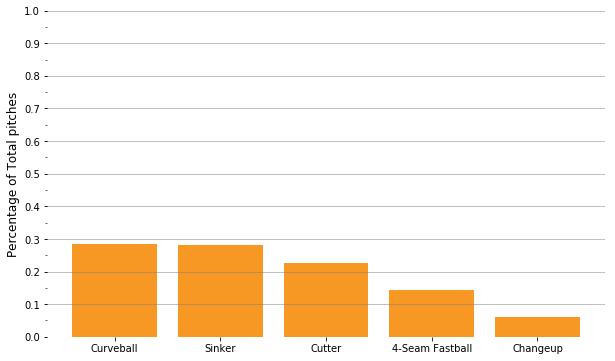

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots()

x = pitch_types.index
y = pitch_types

p1 = plt.bar(x = x, height = y,
             color='#F79824', aa = True)


bigfont = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

smallfont = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

plt.ylabel('Percentage of Total pitches', fontdict = smallfont)
plt.ylim(0,1)

plt.grid(b = True, which = 'major', axis = 'y', color='grey', linewidth=.5)

ax.yaxis.set_major_locator(MultipleLocator(.1))
ax.yaxis.set_minor_locator(MultipleLocator(.05))

fig.set_size_inches(10, 6)

# Remove box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show();

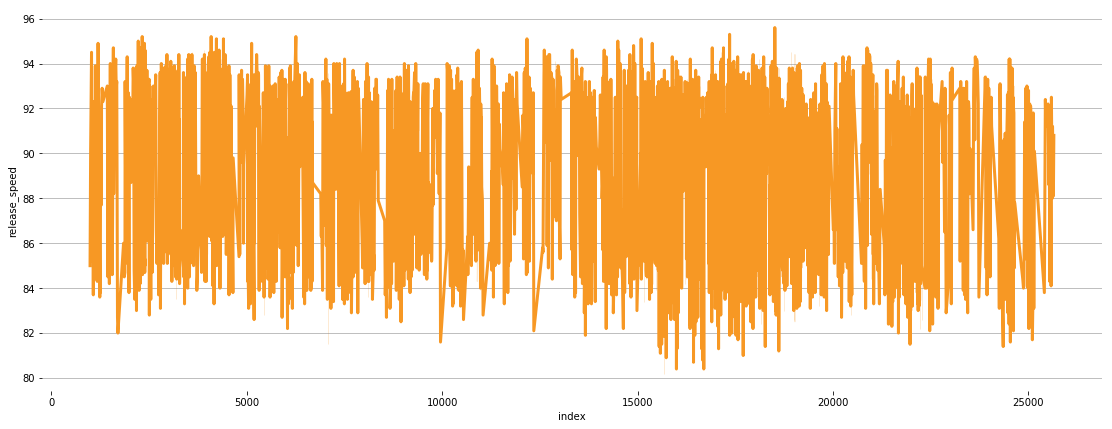

In [16]:
fig, ax = plt.subplots()

x = Coreys_pitches['index']
y = Coreys_pitches['release_speed']

p1 = sns.lineplot(x, y, color='#F79824', linewidth = 3, aa = True)

bigfont = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

smallfont = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

plt.grid(b = True, which = 'major', axis = 'y', color='grey', linewidth=.5)


fig.set_size_inches(19, 7)

# Remove box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show();

# Logistic Regression

In [17]:
Coreys_pitches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3080 entries, 731261 to 6252
Data columns (total 59 columns):
index                              3080 non-null float64
pitch_type                         3080 non-null object
game_date                          3080 non-null datetime64[ns]
release_speed                      3080 non-null float64
player_name                        3080 non-null object
batter                             3080 non-null float64
pitcher                            3080 non-null float64
events                             808 non-null object
description                        3080 non-null object
zone                               3080 non-null float64
stand                              3080 non-null object
p_throws                           3080 non-null object
home_team                          3080 non-null object
away_team                          3080 non-null object
type                               3080 non-null object
hit_location                       7

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
Coreys_pitches['curveball'] = Coreys_pitches['pitch_name'].replace({'Curveball': 1, 'Sinker': 0, 'Cutter': 0,
                                      '4-Seam Fastball': 0, 'Changeup': 0 })

Coreys_pitches['next_pitch_curveball'] = Coreys_pitches['curveball'].shift(-1, fill_value=0)

Coreys_pitches[['curveball','next_pitch_curveball']].head(20)

,curveball,next_pitch_curveball
731261,0,0
731260,0,0
731259,0,0
731258,0,0
731257,0,0
731256,0,0
731255,0,0
731254,0,0
731253,0,0
731252,0,0


In [20]:
features = Coreys_pitches[['release_speed', 'batter', 'pitcher', 'zone',
                           'balls', 'strikes', 'outs_when_up', 'inning',
                           'fielder_2', 'release_extension',
                           'at_bat_number', 'pitch_number', 'home_score',
                           'away_score', 'bat_score', 'fld_score', 'Pitch_ID',
                           'curveball']]

target = Coreys_pitches['next_pitch_curveball']

features.shape, target.shape

KeyError: ignored

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [0]:
model.fit(x_train, y_train)

In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(model.predict(x_test), y_test)

In [0]:
pd.DataFrame(model.predict_proba(x_test))[0].describe()

## Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree

In [0]:
tree.fit(x_train, y_train)

In [0]:
accuracy_score(tree.predict(x_test), y_test)

## Feature Importances

In [0]:
!pip install eli5

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(tree).fit(x_test, y_test)
eli5.show_weights(perm)

### [SHAP Values](https://github.com/slundberg/shap)

In [0]:
!pip install shap

In [0]:
import shap

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(tree)
shap_values = explainer.shap_values(x_test)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test[0:])